## Investment Portfolio optimization using Python

In [12]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
stock_data = pd.read_csv("RELIANCE.csv")
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.6,1344.1,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.2,1356.3,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.0,1353.1,1354.16,2250304,3.047263e+09,56277,1225837,54.47


In [30]:
stock_data["Daily Return"] = stock_data["Close Price"].pct_change()
stock_data.drop(stock_data.index[0],inplace=True)

stock_data.head(4)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily Return
1,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.009077
2,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,-0.002359
3,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-0.019030
4,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-0.006404


In [31]:
ret_mean = stock_data["Daily Return"].mean()
ret_std = stock_data["Daily Return"].std()

ann_ret_mean = ret_mean*252
ann_ret_std = ret_std*math.sqrt(252)

print("Mean expected annual return",round(ann_ret_mean,5))
print("Volatility of the stock",round(ann_ret_std,5))

Mean expected annual return 0.08714
Volatility of the stock 0.43879


### Diversifying Portfolio

In [91]:
rel= pd.read_csv("portfolio/RELIANCE.csv")[["Date","Close Price"]]
rel['Date'] = pd.to_datetime(rel['Date'])
lt = pd.read_csv("portfolio/LT.csv")[["Date","Close Price"]]
lt['Date'] = pd.to_datetime(lt['Date'])
axis = pd.read_csv("portfolio/AXISBANK.csv")[["Date","Close Price"]]
axis['Date'] = pd.to_datetime(axis['Date'])
cip = pd.read_csv("portfolio/CIPLA.csv")[["Date","Close Price"]]
cip['Date'] = pd.to_datetime(cip['Date'])
infy = pd.read_csv("portfolio/INFY.csv")[["Date","Close Price"]]
infy['Date'] = pd.to_datetime(infy['Date'])

rel = rel.rename(columns={'Close Price': 'RELIANCE'})
lt = lt.rename(columns={'Close Price': 'LT'})
axis = axis.rename(columns={'Close Price': 'AXIS'})
cip = cip.rename(columns={'Close Price': 'CIPLA'})
infy = infy.rename(columns={'Close Price': 'INFY'})

portfolio = pd.merge(rel,lt,on="Date")
portfolio = pd.merge(portfolio,axis,on="Date")
portfolio = pd.merge(portfolio,cip,on="Date")
portfolio = pd.merge(portfolio,infy,on="Date")
portfolio.head()

,Date,RELIANCE,LT,AXIS,CIPLA,INFY
0,2017-05-15,1344.10,1742.40,500.1,569.00,951.55
1,2017-05-16,1356.30,1740.70,501.5,565.60,955.00
2,2017-05-17,1353.10,1755.45,502.8,562.35,952.80
3,2017-05-18,1327.35,1722.60,492.0,560.10,961.75
4,2017-05-19,1318.85,1724.55,501.7,564.95,957.95


In [97]:
portfolio.set_index("Date", inplace = True)
portfolio_returns = portfolio.pct_change()
portfolio_returns.drop(portfolio_returns.index[0],inplace=True)
portfolio_returns.head()

,RELIANCE,LT,AXIS,CIPLA,INFY
Date,,,,,
2017-05-16,0.009077,-0.000976,0.002799,-0.005975,0.003626
2017-05-17,-0.002359,0.008474,0.002592,-0.005746,-0.002304
2017-05-18,-0.019030,-0.018713,-0.021480,-0.004001,0.009393
2017-05-19,-0.006404,0.001132,0.019715,0.008659,-0.003951
2017-05-22,0.004019,0.015888,0.001196,-0.003275,0.003654


In [115]:
mean_returns = portfolio_returns.mean()
cov_mat = portfolio_returns.cov()

# Annual Portfolio Return
wt = np.asarray([0.2, 0.2, 0.2, 0.2, 0.2])
annual_portfolio_return = round(np.sum(mean_returns*wt) * 252,5)

# Annual Portfolio volatility
annual_portfolio_vol = round(np.sqrt(np.dot(wt.T,np.dot(cov_mat, wt))) * np.sqrt(252),5)

print("Annual Portfolio Return",annual_portfolio_return)
print("Annual Portfilio Volatility",annual_portfolio_vol)

Annual Portfolio Return 0.04367
Annual Portfilio Volatility 0.17519


### Scatterplot for differing weights of stocks in the Portfolio

In [149]:
diff_portfolios = 5000
pts = np.zeros((3,diff_portfolios))

for i in range(diff_portfolios):
    
    wts = np.random.random(5)
    wts /= np.sum(wts)
    
    # Annual Portfolio Return
    annual_portfolio_return = np.sum(mean_returns*wts) * 252
    # Annual Portfolio volatility
    annual_portfolio_vol = np.sqrt(np.dot(wts.T,np.dot(cov_mat, wts))) * np.sqrt(252)
    
    pts[0,i] = annual_portfolio_return
    pts[1,i] = annual_portfolio_vol
    # Sharpe Ratio
    pts[2,i] = pts[0,i] / pts[1,i]

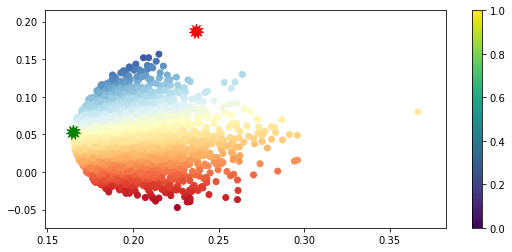

In [155]:
plt.figure(figsize=(9,4))
pts_df = pd.DataFrame(pts.T,columns=['ret','stdev','sharpe'])
plt.scatter(pts_df.stdev,pts_df.ret,c=pts_df.sharpe,cmap='RdYlBu')

# Plotting sharpe ratio is highest
plt.scatter(pts_df[pts_df["sharpe"]==pts_df["sharpe"].max()].stdev, pts_df[pts_df["sharpe"]==pts_df["sharpe"].max()].ret, color="r",marker=(11,1,1),s=200)
# Plotting Volatility is lowest
plt.scatter(pts_df[pts_df["stdev"]==pts_df["stdev"].min()].stdev, pts_df[pts_df["stdev"]==pts_df["stdev"].min()].ret, color="g",marker=(11,1,1),s=200)

plt.colorbar()
plt.show()